# Time Series clustering with CNN autoencoders

![](https://timelyportfolio.github.io/rCharts_time_series/assets/fig/unnamed-chunk-4.png)

In [1]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import time
from tqdm import tqdm

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

import time_series_clustering as tsc

This notebook is an attempt to use a new methodology for clustering time series using ``autoencoders``. <br>
I will use Financial stock price data as test data for their easy accessibility. 


##### Various ideas : 
- Represent as an image with all metrics (open, high,low,etc...)
- Represent as an image with an aggregate by week/month 
- Which hyperparameters for the CNN (kernel size, pooling, etc...) that will have a real interpretation
- Use ``lucid`` library to visualize within the neural network
- Which preprocessing : normalization, difference, logreturns, etc...


##### To do 
- Larger window size from API

# Preparing the data

## Connecting with ``AlphaVantage`` API

Data available via the API https://www.alphavantage.co/

### Retrieve API KEY

In [2]:
import json
API_KEY = json.loads(open("c:/data/tokens.json").read())["ALPHA_VANTAGE"]

### Prepare a wrapper for the API

In [3]:
alpha = tsc.AlphaVantage(api_key=API_KEY)

In [4]:
aapl = alpha.get("AAPL")

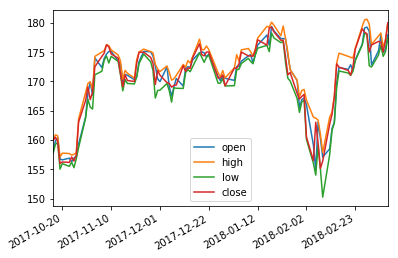

In [5]:
aapl.drop("volume",axis = 1).plot()
plt.show()

## Creating some wrappers

### Prepare a wrapper for the companies data

We will use ``cufflinks`` for easy plotting : http://web.quant-platform.com/trial/yves/Plotly_Cufflinks.html

In [6]:
tsc.init_notebook_mode(connected = True)

In [7]:
aapl = tsc.Company("AAPL",alpha = alpha)

In [8]:
aapl.plot(["open","close"])

### Prepare a wrapper for Companies

In [9]:
c = tsc.Companies(["AAPL","GOOG","MSFT"],alpha = alpha)

Acquiring data: 100%|████████████████████████████| 3/3 [00:01<00:00,  1.53it/s]
Acquiring data: 0it [00:00, ?it/s]


In [10]:
c.plot()

## Extracting data for a given list of companies

### Finding a list of tickers

The simplest way to gather a list of tickers on the web is simply using wikipedia. <br>
I will scrape the data in the page https://en.wikipedia.org/wiki/List_of_S%26P_500_companies to constitute the list

In [11]:
import requests
import bs4 as bs

In [12]:
page = bs.BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies").content,"lxml")

In [13]:
rows = page.find("div",class_ = "mw-parser-output").find("table").findAll("tr")
tickers = pd.DataFrame([{"ticker":row.find("a").text,"link":row.find("a").attrs["href"]} for row in rows],columns = ["ticker","link"])
tickers = tickers.iloc[1:].reset_index(drop = True)

In [14]:
tickers.head(10)

ticker                                  link
0    MMM   https://www.nyse.com/quote/XNYS:MMM
1    ABT   https://www.nyse.com/quote/XNYS:ABT
2   ABBV  https://www.nyse.com/quote/XNYS:ABBV
3    ACN   https://www.nyse.com/quote/XNYS:ACN
4   ATVI     http://www.nasdaq.com/symbol/atvi
5    AYI   https://www.nyse.com/quote/XNYS:AYI
6   ADBE     http://www.nasdaq.com/symbol/adbe
7    AMD      http://www.nasdaq.com/symbol/amd
8    AAP   https://www.nyse.com/quote/XNYS:AAP
9    AES   https://www.nyse.com/quote/XNYS:AES

### Extracting data for the list of symbols

In [15]:
sp = tsc.Companies(tickers = list(tickers.ticker),alpha = alpha)

Acquiring data: 100%|████████████████████████████| 1/1 [00:10<00:00, 10.66s/it]


In [16]:
sp

504 companies in the dataset

##### Saving and reloading

In [17]:
sp.save_as_json("sp500_stock_prices.json")

In [39]:
sp = tsc.Companies(json_path="sp500_stock_prices.json")

##### Plotting

In [18]:
sp.plot()

# Representing the data